Arranco importando pandas y metiendo los csv como dataframes.

In [1]:
import pandas as pd
import numpy as np
import re
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import pycaret as pc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_theme()

In [2]:
df20182 = pd.read_csv(r"Dengue, Zika 2018 - 2.csv")
df2018 = pd.read_csv(r"Dengue, Zika 2018.csv")
df2019 = pd.read_csv(r"Dengue, Zika 2019.csv")
df2020 = pd.read_csv(r"Dengue, Zika 2020.csv")
df2021 = pd.read_csv(r"Dengue, Zika 2021.csv")
df2022 = pd.read_csv(r"Dengue, Zika 2022.csv")
df2023 = pd.read_csv(r"Dengue, Zika 2023.csv")
df2024 = pd.read_csv(r"Dengue, Zika 2024.csv")

Estandarizo el formato de prov_id y de id_depto dependiendo de si están fusionados o no en su csv.

In [3]:
### Hago String a todos los id_depto y prov_id de 2018

df2018['id_depto'] = df2018['id_depto'].values.astype(str)
df2018["prov_id"] = df2018["prov_id"].map(str)

### Aplico el zfill

df2018['id_depto'] = df2018['id_depto'].str.zfill(5)
df2018["prov_id"] = df2018 ["prov_id"].str.zfill(2)

### Hago String a todos los id_depto y prov_id de 2018-2

df20182["id_depto"] = df20182["id_depto"].astype(str)
df20182["prov_id"] = df20182["prov_id"].astype(str)

### Aplico el zfill

df20182['id_depto'] = df20182['id_depto'].str.zfill(3)
df20182['prov_id'] = df20182['prov_id'].str.zfill(2)

### Hago String a todos los id_depto y prov_id de 2019


df2019["id_depto"] = df2019["id_depto"].astype(str)
df2019["prov_id"] = df2019["prov_id"].astype(str)

### Aplico el zfill

df2019['id_depto'] = df2019['id_depto'].str.zfill(5)
df2019["prov_id"] = df2019 ["prov_id"].str.zfill(2)

### Hago String a todos los id_depto y prov_id de 2020

df2020["id_depto"] = df2020["id_depto"].astype(str)
df2020["prov_id"] = df2020["prov_id"].astype(str)

### Aplico el zfill

df2020["id_depto"] = df2020 ["id_depto"].str.zfill(5)
df2020["prov_id"] = df2020 ["prov_id"].str.zfill(2)

### Hago String a todos los id_depto y prov_id de 2021

df2021["id_depto"] = df2021["id_depto"].astype(str)
df2021["prov_id"] = df2021["prov_id"].astype(str)

### Aplico el zfill

df2021["id_depto"] = df2021 ["id_depto"].str.zfill(5)
df2021["prov_id"] = df2021 ["prov_id"].str.zfill(2)

### Hago String a todos los id_depto y prov_id de 2022

df2022["id_depto"] = df2022["id_depto"].astype(str)
df2022["prov_id"] = df2022["prov_id"].astype(str)

### Aplico el zfill

df2022["id_depto"] = df2022 ["id_depto"].str.zfill(3)
df2022["prov_id"] = df2022 ["prov_id"].str.zfill(2)

### Hago String a todos los id_depto y prov_id de 2023

df2023["id_depto"] = df2023["id_depto"].astype(str)
df2023["prov_id"] = df2023["prov_id"].astype(str)

### Aplico el zfill

df2023["id_depto"] = df2023 ["id_depto"].str.zfill(5)
df2023["prov_id"] = df2023 ["prov_id"].str.zfill(2)

### Hago String a todos los id_depto y prov_id de 2024

df2024["id_depto"] = df2024["id_depto"].astype(str)
df2024["prov_id"] = df2024["prov_id"].astype(str)

### Aplico el zfill

df2024["id_depto"] = df2024 ["id_depto"].str.zfill(3)
df2024["prov_id"] = df2024 ["prov_id"].str.zfill(2)

Concateno todos los df en uno sólo:

In [4]:
TablaCompleta = pd.concat([df20182, df2018, df2019, df2020, df2021, df2022, df2023, df2024])

In [5]:
TablaCompleta

,id_depto,depto,prov_id,prov,año,semanas,evento,edad_id,edad_desc,cantidad
0,000,*sin dato*,06,Buenos Aires,2018,11,Dengue,10,De 45 a 64 años,1.0
1,035,Avellaneda,06,Buenos Aires,2018,7,Dengue,8,De 20 a 24 años,1.0
2,035,Avellaneda,06,Buenos Aires,2018,7,Dengue,10,De 45 a 64 años,1.0
3,035,Avellaneda,06,Buenos Aires,2018,9,Dengue,6,De 10 a 14 años,1.0
4,035,Avellaneda,06,Buenos Aires,2018,9,Dengue,8,De 20 a 24 años,1.0
...,...,...,...,...,...,...,...,...,...,...
26961,035,Patiño,34,Formosa,2024,10,Dengue,4,De 2 a 4 años,1.0
26962,091,Maipú,22,Chaco,2024,1,Dengue,9,De 25 a 34 años,1.0
26963,014,Bermejo,22,Chaco,2024,17,Dengue,5,De 5 a 9 años,1.0
26964,043,Fray Justo Santa María de Oro,22,Chaco,2024,12,Dengue,9,De 25 a 34 años,1.0


Termino de estandarizar el formato de id_depto agregandole prov_id a todos los id_depto donde no estaba originalmente

In [6]:
# Encuentro dónde tiene una longitud de 3 caracteres
idcorto = TablaCompleta['id_depto'].str.len() == 3

# Junto los prov_id con el id_depto en las id_depto donde tiene una longitud de 3 caracteres
TablaCompleta.loc[idcorto, 'id_depto'] =  TablaCompleta.loc[idcorto, 'prov_id'] + TablaCompleta.loc[idcorto, 'id_depto']

Info (para ver los elementos no nulos)

In [7]:
TablaCompleta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45860 entries, 0 to 26965
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_depto   45860 non-null  object 
 1   depto      45860 non-null  object 
 2   prov_id    45860 non-null  object 
 3   prov       45860 non-null  object 
 4   año        45860 non-null  int64  
 5   semanas    45860 non-null  object 
 6   evento     45860 non-null  object 
 7   edad_id    45858 non-null  object 
 8   edad_desc  45860 non-null  object 
 9   cantidad   45859 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.8+ MB


Describe (Para ver datos generales de la tabla)

In [8]:
TablaCompleta.describe()

,año,cantidad
count,45860.000000,45859.000000
mean,2022.525534,11.058920
std,1.985661,43.354523
min,2018.000000,1.000000
25%,2020.000000,1.000000
50%,2024.000000,2.000000
75%,2024.000000,7.000000
max,2024.000000,2226.000000


Código para transformar el dataframe en un csv 

In [9]:
TablaCompleta.to_csv("CSVs Creados/TablaCompleta.csv", index=False)

Creo una serie que contiene la cantidad de veces que se repite cada provincia

In [10]:
# Cuento cuantas veces sale cada prov
CantProv = TablaCompleta['prov'].value_counts()
CantProv

prov
Buenos Aires           8220
Chaco                  5709
Salta                  3595
Misiones               3508
Santa Fe               3296
CABA                   3020
Córdoba                2973
Formosa                2544
Tucumán                2507
Corrientes             1798
Entre Ríos             1572
Jujuy                  1344
Santiago del Estero    1287
Catamarca               967
La Rioja                867
Mendoza                 565
San Juan                544
San Luis                385
desconocida             258
La Pampa                221
Santa Cruz              198
Tierra del Fuego        147
Chubut                  112
Neuquén                 111
Río Negro                64
SAnta Fe                 30
C�rdoba                   8
(en blanco)               5
DESCONOCIDA               2
desconocidoo              1
desconocido               1
SAnta Cruz                1
Name: count, dtype: int64

El siguiente paso es agrupar las provincias con su valor correcto (SAnta Cruz con Santa Cruz; juntar los desconocidos, etc.)

In [11]:
# Estandarizo las Mayusculas  
TablaCompleta['prov'] = TablaCompleta['prov'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True).str.title()

In [12]:
# Corrijo los errores
TablaCompleta['prov'] = TablaCompleta['prov'].replace('(En Blanco)', 'Desconocida')
TablaCompleta['prov'] = TablaCompleta['prov'].replace('Desconocido', 'Desconocida')
TablaCompleta['prov'] = TablaCompleta['prov'].replace('Desconocidoo', 'Desconocida')
TablaCompleta['prov'] = TablaCompleta['prov'].replace('Desconocida', pd.NA)
TablaCompleta['prov'] = TablaCompleta['prov'].replace('Caba', 'CABA')
TablaCompleta['prov'] = TablaCompleta['prov'].replace('C�Rdoba', 'Córdoba')

Limpieza de 'prov' completa.

Hago lo mismo para depto

In [13]:
CantDepto = TablaCompleta['depto'].value_counts()
CantDepto

depto
Capital                    3276
San Fernando                697
Formosa                     643
Grl. José de San Martín     628
desconocido                 614
                           ... 
Tres Lomas                    1
Lobería                       1
Lezama                        1
Picunches                     1
General Guido                 1
Name: count, Length: 485, dtype: int64

In [14]:
TablaCompleta['depto'] = TablaCompleta['depto'].str.replace(r'([a-z])([A-Z])', r'\1 \2', regex=True).str.title()

In [15]:
TablaCompleta['depto'] = TablaCompleta['depto'].replace('(En Blanco)', 'Desconocida')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Desconocido', 'Desconocida')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Desconocidoo', 'Desconocida')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Desconocida', pd.NA)
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Jun�N', 'Junín')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Santa Mar�A', 'Santa María')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Ituzaing�', 'Ituzaingo')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Lan�S', 'Lanús')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Mor�N', 'Morón')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Col�N', 'Colón')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Or�N', 'Orán')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Guaran�', 'Guaraní')
TablaCompleta['depto'] = TablaCompleta['depto'].replace('Constituci�N', 'Constitución')

Ahora, notamos como en algunos casos; 'Dengue' figura en la columna 'semanas' en vez de en la de 'evento' (y vice-versa); trataremos de arreglar esto:

In [16]:
# Agarro las filas donde evento está compuesto por nros
filas_malas = TablaCompleta['evento'].str.isnumeric()

# Hago un df temporal con las filas que tienen mal la información
temp_df = TablaCompleta.loc[filas_malas, ['evento', 'semanas']]

# Switcheo los nombres de las columnas del df temporal para que quede bien
temp_df = temp_df.rename(columns={'evento': 'semanas', 'semanas': 'evento'})

# Reinserto el df temporal en el df original
TablaCompleta.loc[filas_malas, ['evento', 'semanas']] = temp_df

Lo mismo pasa con las edades y edad_id

In [17]:
# Agarro las filas donde edad_desc está compuesto por nros
filas_malas = TablaCompleta['edad_desc'].str.isnumeric()

# Hago un df temporal con las filas que tienen mal la información
temp_df = TablaCompleta.loc[filas_malas, ['edad_desc', 'edad_id']]

# Switcheo los nombres de las columnas del df temporal para que quede bien
temp_df = temp_df.rename(columns={'edad_desc': 'edad_id', 'edad_id': 'edad_desc'})

# Reinserto el df temporal en el df original
TablaCompleta.loc[filas_malas, ['edad_desc', 'edad_id']] = temp_df

# Filleo los valores nulos de la columna 'edad_id' con 0
TablaCompleta['edad_id'] = TablaCompleta['edad_id'].fillna(0)

# Filleo los valores nulos de la columna 'edad_desc' con 'Desconocido/Sin Especificar'
TablaCompleta['edad_desc'] = TablaCompleta['edad_desc'].fillna('Desconocido/Sin Especificar')




Estandarizo ahora más detalles de las columnas de edades:

In [18]:
TablaCompleta['edad_desc'] = TablaCompleta['edad_desc'].str.replace('anos', 'años', regex=True, flags=re.IGNORECASE)
TablaCompleta['edad_desc'] = TablaCompleta['edad_desc'].str.replace('ano', 'año', regex=True, flags=re.IGNORECASE)

# Estandarizo las mayúsculas de edad_desc

TablaCompleta['edad_desc'] = TablaCompleta['edad_desc'].str.title()

'''  Ahora me aseguro que el mismo nro. de edad_id se corresponda con la misma descripción; dónde: 
0- Desconocido/Sin Especificar
1- Menor a 1 año
2- 1 a 2 años
3- 2 a 4 años
4- 5 a 9 años
5- 10 a 14 años
6- 15 a 24 años
7- 25 a 34 años
8- 35 a 44 años
9- 45 a 64 años
10- Mayor o igual a 65
'''

condition = TablaCompleta['edad_desc'].str.contains('1 a 2 años', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 2, TablaCompleta['edad_id'])

condition = TablaCompleta['edad_desc'].str.contains('2 a 4 años', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 3, TablaCompleta['edad_id'])

condition = TablaCompleta['edad_desc'].str.contains('13 a 24', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 3, TablaCompleta['edad_id'])
TablaCompleta['edad_desc'] = np.where(condition, '1 a 2 años', TablaCompleta['edad_desc'])

condition = TablaCompleta['edad_desc'].str.contains('5 a 9 años', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 4, TablaCompleta['edad_id'])

condition = TablaCompleta['edad_desc'].str.contains('10 a 14 años', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 5, TablaCompleta['edad_id'])

condition = (TablaCompleta['edad_desc'].str.contains('15 a', case=False, regex=False) | 
             TablaCompleta['edad_desc'].str.contains('24', case=False, regex=False))
TablaCompleta['edad_id'] = np.where(condition, 6, TablaCompleta['edad_id'])
TablaCompleta['edad_desc'] = np.where(condition, 'De 15 a 24 años', TablaCompleta['edad_desc'])

condition = TablaCompleta['edad_desc'].str.contains('25 a 34 años', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 7, TablaCompleta['edad_id'])

condition = TablaCompleta['edad_desc'].str.contains('35 a 44 años', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 8, TablaCompleta['edad_id'])

condition = TablaCompleta['edad_desc'].str.contains('45 a 64 años', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 9, TablaCompleta['edad_id'])

condition = TablaCompleta['edad_desc'].str.contains('65', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 10, TablaCompleta['edad_id'])
TablaCompleta['edad_desc'] = np.where(condition, 'Mayor a 65 años', TablaCompleta['edad_desc'])

condition = TablaCompleta['edad_desc'].str.contains('nato', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 1, TablaCompleta['edad_id'])
TablaCompleta['edad_desc'] = np.where(condition, 'Menor a 1 año', TablaCompleta['edad_desc'])

condition = TablaCompleta['edad_desc'].str.contains('menor', case=False, regex=False)
TablaCompleta['edad_desc'] = np.where(condition, 'Menor a 1 año', TablaCompleta['edad_desc'])

condition = TablaCompleta['edad_desc'].str.contains('-', case=False, regex=False)
TablaCompleta['edad_desc'] = np.where(condition, 'Desconocido/Sin Especificar', TablaCompleta['edad_desc'])


condition = TablaCompleta['edad_desc'].str.contains('Sin', case=False, regex=False)
TablaCompleta['edad_id'] = np.where(condition, 0, TablaCompleta['edad_id'])
TablaCompleta['edad_desc'] = np.where(condition, 'Desconocido/Sin Especificar', TablaCompleta['edad_desc'])



## Limpio los eventos

In [19]:
condition = TablaCompleta['evento'].str.contains('Zi', case=False, regex=False)
TablaCompleta['evento'] = np.where(condition, 'Zika', TablaCompleta['evento'])


condition = TablaCompleta['evento'].str.contains('Den', case=False, regex=False)
TablaCompleta['evento'] = np.where(condition, 'Dengue', TablaCompleta['evento'])

## Limpio los deptos

In [20]:
# Creo una mascara para identificar los valores donde los últimos 3 dígitos de id_depto son 000 (y por ende la ubicación es desconocida)
mask = TablaCompleta['id_depto'].astype(str).str[-3:] == '000'

# Anulo las instancias donde se cumple la mascara
TablaCompleta.loc[mask, 'depto'] = pd.NA

# Me fijo cuantos valores nulos y no-nulos quedan en la tabla
total_null_values = TablaCompleta.isnull().sum().sum()
print(f"Total number of null values in the DataFrame: {total_null_values}")

non_null_values = TablaCompleta.notna().sum().sum()
print(f"Non-null values in the 'prov' column:\n{non_null_values}")

#Cómo representan un porcentaje no significativo, los dropeo
TablaCompleta = TablaCompleta.dropna() 

# Convert the 'id_depto' column to string
TablaCompleta['id_depto'] = TablaCompleta['id_depto'].astype(str)

# Veo cuantas veces no se sabe la provincia
id00 = TablaCompleta['id_depto'].str.startswith('00').sum()

# Notamos que en la tabla hay instancias de algunos deptos donde falta que el id_depto identifique la provincia
condition = TablaCompleta['depto'].str.contains('matanza', case=False, regex=False)
TablaCompleta['depto'] = np.where(condition, 'La Matanza', TablaCompleta['depto'])
TablaCompleta['id_depto'] = np.where(condition, '06427', TablaCompleta['id_depto'])

condition = (TablaCompleta['depto'] == ('Comuna 1'))
TablaCompleta['id_depto'] = np.where(condition, '02001', TablaCompleta['id_depto'])


print(f"Hay {id00} columnas que arrancan con '00'.")

# Acomodo las Comunas (que el estandar varía según que año de documentación)

# Arranco convirtiendolo en un string para poder aplicarle startswith
TablaCompleta['id_depto'] = TablaCompleta['id_depto'].astype(str)

# Creo la mascara
mask = TablaCompleta['id_depto'].str.startswith('020') & TablaCompleta['id_depto'].str[3:].apply(lambda x: x.isdigit() and 1 <= int(x) <= 15)

# Actualizo la columna deptos
TablaCompleta.loc[mask, 'depto'] = 'Comuna ' + TablaCompleta.loc[mask, 'id_depto'].str[3:]

# Como solo hay 35 instancias en las que id_depto arranca con 00, los nulifico y elimino a todos
id00 = TablaCompleta['id_depto'].str.startswith('00').sum()
TablaCompleta['id_depto'] = np.where(condition, pd.NA, TablaCompleta['id_depto'])
TablaCompleta = TablaCompleta.dropna()




Total number of null values in the DataFrame: 950
Non-null values in the 'prov' column:
457650
Hay 35 columnas que arrancan con '00'.


# Limpio provincias

In [21]:
condition = TablaCompleta['prov'].str.contains('Entre', case=False, regex=False)
TablaCompleta['prov_id'] = np.where(condition, '30', TablaCompleta['prov_id'])

Paso siguiente: Reducir la granularidad (Pasar semanas -> meses)

In [22]:
# Convierto las semanas a meses

TablaCompleta['mes'] = TablaCompleta['semanas'].astype(int).apply(lambda x: calendar.month_name[((x - 1) // 4 + 1) % 12 or 12])

# Elimino la columna semanas (Ya qué se volvió irrelevante)
TablaCompleta = TablaCompleta.drop('semanas', axis=1)


# Limpio los Datos Climáticos

In [23]:
#cargo csv en df
df_estaciones_detalle = pd.read_csv("Datos Climáticos/Exp. 203460.csv")
df_estaciones_depto = pd.read_csv("Datos Climáticos/estaciones smn PAIS.csv")


In [24]:
df_estaciones_detalle

,Estacion,Fecha,Temp. Maxima (°C),Temp. Minima (°C),Temp. Media (°C),Hum. Relativa Media (%)
0,87007,2018-01-01,23,7.8,14.1,79
1,87007,2018-01-02,20.6,7.5,12.9,60
2,87007,2018-01-03,18,5.4,11.2,69
3,87007,2018-01-04,22.2,5,13,66
4,87007,2018-01-05,23.4,7.6,15.8,55
...,...,...,...,...,...,...
266804,87938,2024-06-16,0.9,-2.3,-0.6,88
266805,87938,2024-06-17,-0.6,-3,-2.2,89
266806,87938,2024-06-18,-0.4,-3.3,-1.6,88
266807,87938,2024-06-19,-0.2,-2.6,-1.3,87


In [25]:
df_estaciones_depto

,NOMBRE,PROVINCIA,LAT [gr],LAT [min],LONG [gr],LONG [min],ALT. (m),NRO
0,AZUL AERO,BUENOS AIRES,-36,50,-59,53,147,87641
1,BAHIA BLANCA AERO,BUENOS AIRES,-38,44,-62,10,83,87750
2,BENITO JUAREZ AERO,BUENOS AIRES,-37,43,-59,47,207,87649
3,BOLIVAR AERO,BUENOS AIRES,-36,12,-61,4,94,87640
4,CAMPO DE MAYO AERO,BUENOS AIRES,-34,32,-58,40,26,87570
...,...,...,...,...,...,...,...,...
113,SANTIAGO DEL ESTERO AERO,SANTIAGO DEL ESTERO,-27,46,-64,18,199,87129
114,TERMAS DE RIO HONDO AERO,SANTIAGO DEL ESTERO,-27,29,-64,56,280,87127
115,RIO GRANDE B.A.,TIERRA DEL FUEGO,-53,48,-67,45,22,87934
116,USHUAIA AERO,TIERRA DEL FUEGO,-54,48,-68,19,57,87938


Estandarizamos la nomenclatura para que coincida con las demás tablas

In [26]:
#limpiamos los nombres de las columnas para que coincidan con las otras tablas
df_estaciones_depto = df_estaciones_depto.rename(columns={'PROVINCIA': 'prov'})
df_estaciones_depto = df_estaciones_depto.rename(columns={'NOMBRE': 'depto'})

#limpiamos estandarizamos los nombres de las provincias y departamentos
df_estaciones_depto = df_estaciones_depto.map(lambda x: x.title() if isinstance(x, str) else x)
df_estaciones_depto['depto'] = df_estaciones_depto['depto'].str.replace('Aero', '')

#cambio de nombre la columna NRO por Estación

df_estaciones_depto = df_estaciones_depto.rename(columns={'NRO': 'Estacion'})
df_estaciones_depto

,depto,prov,LAT [gr],LAT [min],LONG [gr],LONG [min],ALT. (m),Estacion
0,Azul,Buenos Aires,-36,50,-59,53,147,87641
1,Bahia Blanca,Buenos Aires,-38,44,-62,10,83,87750
2,Benito Juarez,Buenos Aires,-37,43,-59,47,207,87649
3,Bolivar,Buenos Aires,-36,12,-61,4,94,87640
4,Campo De Mayo,Buenos Aires,-34,32,-58,40,26,87570
...,...,...,...,...,...,...,...,...
113,Santiago Del Estero,Santiago Del Estero,-27,46,-64,18,199,87129
114,Termas De Rio Hondo,Santiago Del Estero,-27,29,-64,56,280,87127
115,Rio Grande B.A.,Tierra Del Fuego,-53,48,-67,45,22,87934
116,Ushuaia,Tierra Del Fuego,-54,48,-68,19,57,87938


In [27]:
#creamos la nueva tabla con las columnas Estación, depto y provincia
df_estaciones_depto = df_estaciones_depto[['Estacion', 'depto', 'prov']]

#corrijo problema con las ñ
df_estaciones_depto = df_estaciones_depto.map(lambda x: x.replace('ﾑ', 'ñ') and x.title() if isinstance(x, str) else x)

df_estaciones_depto

,Estacion,depto,prov
0,87641,Azul,Buenos Aires
1,87750,Bahia Blanca,Buenos Aires
2,87649,Benito Juarez,Buenos Aires
3,87640,Bolivar,Buenos Aires
4,87570,Campo De Mayo,Buenos Aires
...,...,...,...
113,87129,Santiago Del Estero,Santiago Del Estero
114,87127,Termas De Rio Hondo,Santiago Del Estero
115,87934,Rio Grande B.A.,Tierra Del Fuego
116,87938,Ushuaia,Tierra Del Fuego


In [28]:
#Creamos los csv de los nuevos dataframes
df_estaciones_depto.to_csv("CSVs Creados/df_estaciones_depto.csv", index=False)
df_estaciones_detalle.to_csv("CSVs Creados/df_estaciones_detalle.csv", index=False)

Una vez hecho esto; reviso cómo está quedando la TablaCompleta y la vuelvo a pasar a un csv:

In [29]:
TablaCompleta

,id_depto,depto,prov_id,prov,año,evento,edad_id,edad_desc,cantidad,mes
1,06035,Avellaneda,06,Buenos Aires,2018,Dengue,6,De 15 a 24 años,1.0,February
2,06035,Avellaneda,06,Buenos Aires,2018,Dengue,9,De 45 A 64 Años,1.0,February
3,06035,Avellaneda,06,Buenos Aires,2018,Dengue,5,De 10 A 14 Años,1.0,March
4,06035,Avellaneda,06,Buenos Aires,2018,Dengue,6,De 15 a 24 años,1.0,March
5,06035,Avellaneda,06,Buenos Aires,2018,Dengue,7,De 25 A 34 Años,1.0,March
...,...,...,...,...,...,...,...,...,...,...
26961,34035,Patiño,34,Formosa,2024,Dengue,3,De 2 A 4 Años,1.0,March
26962,22091,Maipú,22,Chaco,2024,Dengue,7,De 25 A 34 Años,1.0,January
26963,22014,Bermejo,22,Chaco,2024,Dengue,4,De 5 A 9 Años,1.0,May
26964,22043,Fray Justo Santa María De Oro,22,Chaco,2024,Dengue,7,De 25 A 34 Años,1.0,March


In [30]:
TablaCompleta.to_csv("CSVs Creados/TablaCompleta.csv", index=False)

# Siguientes objetivos:

1) Añadir Dataset de lluvias, humedad y de temperaturas por provincia (o departamento) anualizado para el período que cubren los datasets de dengue. (2018 - 2024) (Esperando respuesta del SMN) Respuesta recibida el lunes. Integración de las nuevas tablas al trabajo para la próxima entrega.

2) Normalizar todas las tablas

3) Gráficos y Análisis Exploratorio

4) Reconocimiento de patrones (clasificación, regresión, clustering, etc) 

5) Evaluación e interpretación de métricas

6) Armar modelo predictivo y gráficos finales

7) Dashboard

# Acá van a ir las transformaciones necesarias para incluir los datos del SMN  

# Normalizo las tablas:

### Se crean los df nuevos

In [31]:
Provincias = TablaCompleta[['prov_id', 'prov']].drop_duplicates().reset_index(drop = True).sort_values(by='prov_id')
Departamentos = TablaCompleta[['id_depto', 'depto']].drop_duplicates().reset_index(drop = True).sort_values(by='id_depto')
Edades = TablaCompleta[['edad_id', 'edad_desc']].drop_duplicates().reset_index(drop=True).sort_values(by='edad_id')
Eventos = TablaCompleta[['evento']].drop_duplicates().reset_index(drop = True)
Reportes = TablaCompleta[['prov_id','id_depto', 'año', 'mes', 'evento', 'edad_id', 'cantidad']]
Reportes['id_reporte'] = range(1, len(Reportes) + 1)

In [32]:
Departamentos.sample(5)

,id_depto,depto
251,18161,San Roque
173,06408,Hurlingham
276,34042,Pilagás
74,06364,General San Martin
135,66070,Iruya


### Se exportan los df normalizados como csv:

In [33]:
Provincias.to_csv('CSVs Creados/Provincias.csv', index=False)
Departamentos.to_csv('CSVs Creados/Departamentos.csv', index=False)
Edades.to_csv('CSVs Creados/Edades.csv', index=False)
Eventos.to_csv('CSVs Creados/Eventos.csv', index=False)
Reportes.to_csv('CSVs Creados/Reportes.csv', index=False)

# Gráficos y Analisis exploratorio

In [34]:
CantProv = Reportes['prov_id'].value_counts()
CantProv

prov_id
06    8165
22    5692
66    3571
54    3508
82    3326
14    2924
02    2544
34    2519
90    2450
18    1780
30    1566
38    1342
86    1275
10     964
46     864
50     560
70     541
74     385
42     221
78     198
94     144
26     112
58     111
62      64
Name: count, dtype: int64

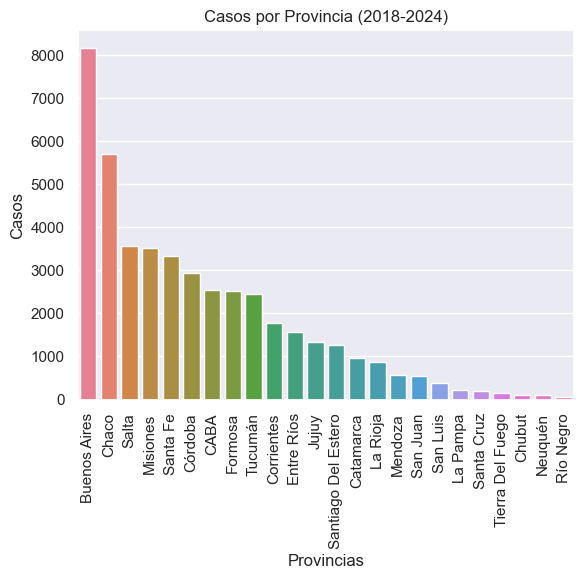

In [35]:
CantProv.columns = ['prov_id', 'count']

# Junto los dataframes para que se vean los nombres de las provincias en vez de los ids
CantProv_por_prov = pd.merge(CantProv, Provincias, on='prov_id', how='left')
CantProv_por_prov['prov'] = CantProv_por_prov['prov'].astype('category')

paleta = sns.color_palette("husl", len(CantProv_por_prov['prov'].unique()))

# Armo el gráfico con seaborn
sns.barplot(data=CantProv_por_prov, x='prov', y='count', palette=paleta, order=CantProv_por_prov.sort_values('count', ascending=False)['prov'])

plt.title('Casos por Provincia (2018-2024)')
plt.xlabel('Provincias')
plt.ylabel('Casos')
plt.xticks(rotation=90)
plt.show()


Vemos que la mayoría de casos reportados son en PBA, directamente seguidos por Chaco y Salta

Siguente gráfico: Casos sobre tiempo

In [36]:
def month_name_to_number(month_name):
    month_abbr = month_name[:3].capitalize()
    return list(calendar.month_abbr).index(month_abbr) 

Meses = Reportes['mes'].apply(month_name_to_number)

# Le cambio el formato a la columna meses
Meses = pd.to_datetime(Meses, format='%m').dt.month


# Me aseguro que figure como series para poder hacer los siguientes pasos
Meses = pd.Series(Meses)

# Nuevo df con los datos que necesito
df_analisis = pd.DataFrame({'Mes': Meses, 'año': Reportes['año'], 'Cantidad': Reportes['cantidad'].astype(int)})

# Vuelvo a tirar el format %m por si acaso
df_analisis['Mes'] = pd.to_datetime(df_analisis['Mes'], format='%m').dt.month


# Hago una columna para los cuatrimestres
df_analisis['Cuatrimestre'] = df_analisis['Mes'].apply(lambda x: (x - 1) // 3 + 1)

# Hago otra que incluye columna y año en un formato donde es facilmente ordenable
df_analisis['Cuatrimestre Completo'] = df_analisis.apply(lambda row: f"{row['año']} Q{(row['Mes'] - 1) // 3 + 1}", axis=1)

df_analisis


,Mes,año,Cantidad,Cuatrimestre,Cuatrimestre Completo
1,2,2018,1,1,2018 Q1
2,2,2018,1,1,2018 Q1
3,3,2018,1,1,2018 Q1
4,3,2018,1,1,2018 Q1
5,3,2018,1,1,2018 Q1
...,...,...,...,...,...
26961,3,2024,1,1,2024 Q1
26962,1,2024,1,1,2024 Q1
26963,5,2024,1,2,2024 Q2
26964,3,2024,1,1,2024 Q1


In [37]:
df_analisis.to_numpy()
cuatrimestre_sumatorias = df_analisis.groupby('Cuatrimestre Completo')['Cantidad'].sum().reset_index()
cuatrimestre_sumatorias2 = df_analisis.groupby('Cuatrimestre')['Cantidad'].sum().reset_index()
sumatoria_año = df_analisis.groupby('año')['Cantidad'].sum().reset_index()


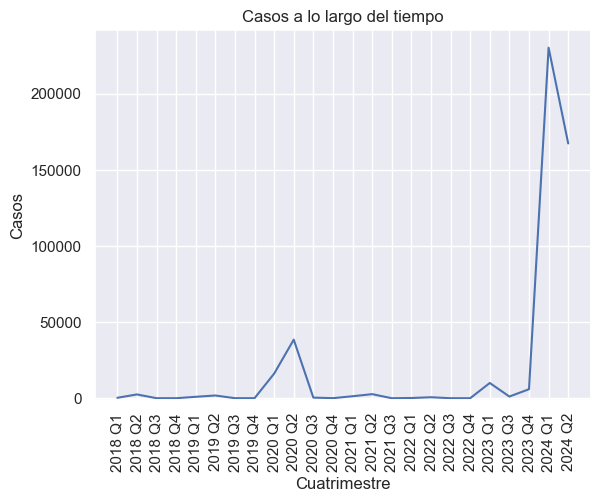

In [38]:
sns.lineplot(data=cuatrimestre_sumatorias, x='Cuatrimestre Completo', y='Cantidad')
ax = plt.gca()
ax.set_ylim(bottom=0-1000, top=max(cuatrimestre_sumatorias['Cantidad'] * 1.05))  # Limites superior e inferior
y_ticks = range(0, (max(cuatrimestre_sumatorias['Cantidad'])) +2000, 50000)  # Cada cuánto se muestra la cant. en el eje y
ax.set_yticks(y_ticks)

plt.title('Casos a lo largo del tiempo')
plt.xlabel('Cuatrimestre')
plt.ylabel('Casos')
plt.xticks(rotation=90)
plt.show()


Vemos cómo el pico de 2024 fue tan grande que trivializa a todos los demás picos con excepción del de 2020 y el de 2023

In [39]:
cuatrimestre_sumatorias

,Cuatrimestre Completo,Cantidad
0,2018 Q1,270
1,2018 Q2,2502
2,2018 Q3,19
3,2018 Q4,7
4,2019 Q1,938
5,2019 Q2,1796
6,2019 Q3,29
7,2019 Q4,26
8,2020 Q1,16144
9,2020 Q2,38463


In [40]:
cuatrimestre_sumatorias2

,Cuatrimestre,Cantidad
0,1,259026
1,2,213380
2,3,1574
3,4,6001


In [41]:
sumatoria_año

,año,Cantidad
0,2018,2798
1,2019,2789
2,2020,55060
3,2021,3991
4,2022,802
5,2023,17038
6,2024,397503


Estaciones:
Verano: Finales de diciembre - finales de marzo (Aproximable a Q1)  
Otoño: Marzo a Junio (Q2)      
Invierno: Junio a Septiembre (Q3)   
Primavera: Septiembre a Diciembre (Q4)  

----
Si bien las estaciones no se corresponden exactamente 1 a 1 con los cuatrimestres; es evidente cómo la gran mayoría de los casos se dan en la primera mitad del año (Especialmente en el Q1), mientras que los casos en el Q3 (Que se corresponde mayormente con el invierno son casi despreciables).

También es notorio cómo hay años donde tiende a dispararse fuertemente (2020, 2023 y 2024); y cómo en 2022 hubo sólo 802 casos de Dengue y Zika. Además es notable cómo 2023 tuvo sus casos distribuídos de forma bastante más uniforme que otros años.

Habiendo recibido recientemente las estadísticas que solicitamos al SMN; el próximo objetivo a corto plazo es integrarlas al análisis de datos y ver que tantas de las observaciones se deben a fenómenos climáticos; y cuales a otros motivos (Desde manejo y desmanejo de las medidas preventivas a faltantes de recursos).

In [42]:
Reportes['evento'].value_counts()
 



evento
Dengue    44758
Zika         68
Name: count, dtype: int64

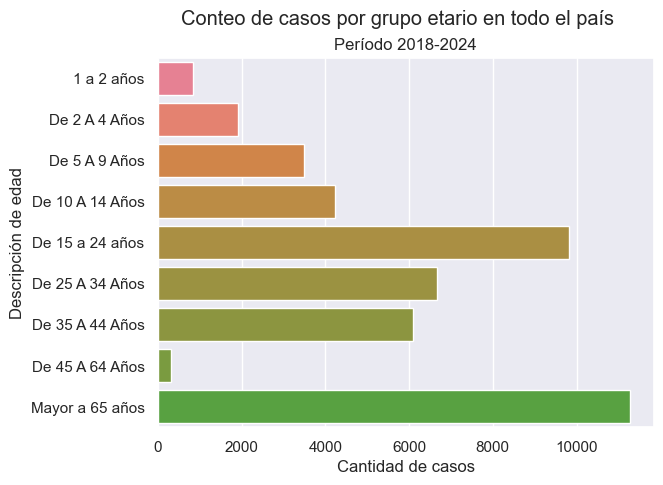

In [100]:
# Creo un filtro para eliminar datos irrelevantes
valores_eliminables = ['Menor a 1 año', 'Desconocido/Sin Especificar', 'Igual A 1 Año']
TablaCompleta_filtrada_por_edad = TablaCompleta[~TablaCompleta['edad_desc'].isin(valores_eliminables)]

# Defino un orden de edades para tener un gráfico más claro
orden_edad = ['1 a 2 años', 'De 2 A 4 Años', 'De 5 A 9 Años', 'De 10 A 14 Años', 
              'De 15 a 24 años', 'De 25 A 34 Años', 'De 35 A 44 Años', 'De 45 A 64 Años', 'Mayor a 65 años']

# Convierto la columna 'edad_desc' en una categoría con un orden específico
TablaCompleta_filtrada_por_edad['edad_desc'] = pd.Categorical(TablaCompleta['edad_desc'], categories=orden_edad, ordered=True)

# Agrupo los valores por edad para ver la cantidad de casos
conteo_por_edad = TablaCompleta_filtrada_por_edad.groupby('edad_desc').size().reset_index(name='counts')

# Creación del gráfico de barras
sns.barplot(x='counts', y='edad_desc',palette=paleta, data=conteo_por_edad)
plt.xlabel('Cantidad de casos')
plt.ylabel('Descripción de edad')
plt.suptitle('Conteo de casos por grupo etario en todo el país')
plt.title('Período 2018-2024')
plt.show()

In [90]:

#Creamos una tabla específica para ver la distribución de casos por departamento de Buenos Aires
df_Buenos_aires = TablaCompleta[TablaCompleta['prov'] == 'Buenos Aires']

#Pasamos los datos de la columna 'cantidad' de float a int
df_Buenos_aires['cantidad'] = df_Buenos_aires['cantidad'].astype(int)

#Agrupamos los datos por departamento y sumamos la cantidad de casos 
df_depto_BsAs = df_Buenos_aires.groupby('depto')['cantidad'].sum().sort_values(ascending=False)

#Calculamos con np.percentile qué datos se encuentran dentro del percentil 90
df_depto_BsAs_percentile90 = np.percentile(df_depto_BsAs, 90)

#Agregamos la condición para graficar los departamentos con mayor concentración de casos
df_depto_BsAs_max = df_depto_BsAs[df_depto_BsAs >= df_depto_BsAs_percentile90]

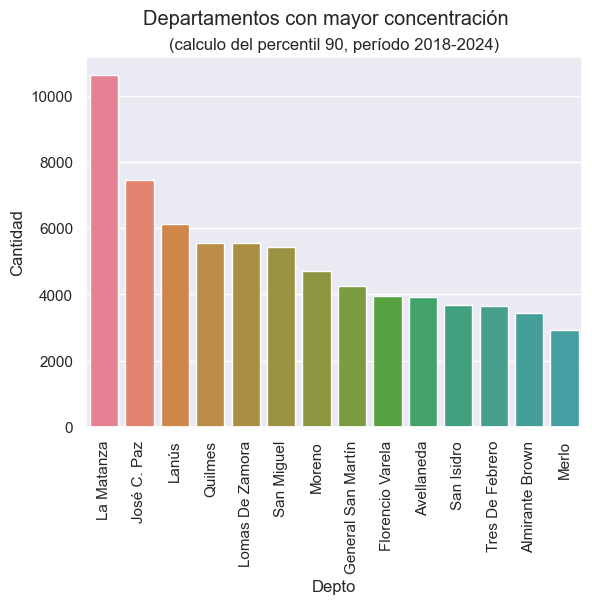

In [99]:
#Creamos el gráfico de barra específico para los departamentos
sns.barplot(df_depto_BsAs_max, palette=paleta)
plt.xlabel('Depto')
plt.ylabel('Cantidad')
plt.suptitle('Departamentos con mayor concentración')
plt.title('(calculo del percentil 90, período 2018-2024)')
plt.xticks(rotation=90)
plt.show()

# Objetivos próximos:

- Tener prearmado el dashboard
- Hacer un modelo predictivo con ML
- Relacionar algo (aunque sea medio por encima) con los datos climáticos